<a href="https://colab.research.google.com/github/samarth2015/CS203_Lab_2/blob/main/assignment_q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 2 (Team 23)

*   Praneel Joshi- 23110254
*   Sonawane Samarth- 23110317



Mount Google Drive to access files stored in it.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!rm -rf gx # Remove any existing gx directory to ensure a clean slate for Great Expectations setup.
!pip install pandas # Install the required Python panda library
!pip install great_expectations -q # Install the required Python Great Expectations library

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.6/813.6 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 82.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 34.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.1.4 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 2.1.4 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 2.1.4 which is incompatible.




* Importing great_expectations for setting up data validation and checkpoints.
* Importing pandas for handling and processing data.






In [ ]:
import great_expectations as gx
from great_expectations.data_context.types.base import DataContextConfig
from great_expectations.checkpoint import CheckpointResult

import pandas as pd

Reading the Citibike trip data CSV file

In [ ]:
citibike1=pd.read_csv("/content/drive/MyDrive/202412-citibike-tripdata/202412-citibike-tripdata_1.csv")

<ipython-input-4-c29a042a9f9c>:1: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  citibike1=pd.read_csv("/content/drive/MyDrive/202412-citibike-tripdata/202412-citibike-tripdata_1.csv")


Loading the read CSV file in Pandas DataFrame by nam df

In [ ]:
df=pd.DataFrame(citibike1)

Converting start_station_id and end_station_id into str for better processing

In [ ]:
citibike1['start_station_id'] = citibike1['start_station_id'].astype(str)
citibike1['end_station_id'] = citibike1['end_station_id'].astype(str)


Setting the Great Expectations context in file mode.

In [ ]:
context = gx.get_context(mode="file")

In [ ]:
data_source_name="my_data_source"
data_source=context.data_sources.add_pandas(name=data_source_name) # Making a new Pandas data source for Great Expectations.

data_asset_name = "my_dataframe_data_asset"
data_asset = data_source.add_dataframe_asset(name=data_asset_name) # Making a data asset for the DataFrame to do validation.

Making a batch that includes the entire DataFrame for validation.

In [ ]:
batch_definition=data_asset.add_batch_definition_whole_dataframe("my batch definition")
my_batch_parameter = {"dataframe":df}
my_batch=batch_definition.get_batch(my_batch_parameter)

Making a suite that will store all expectations to do validation

In [ ]:
my_suite_name="my_suite"
suite=gx.ExpectationSuite(name=my_suite_name)


In [ ]:

suite=context.suites.add(suite)


In [ ]:
expectation1=gx.expectations.ExpectColumnValuesToBeOfType(
    column="ride_id",
    type_="str"
) # making an expectation to check the if the datatype of ride_id is str or not

expectation2=gx.expectations.ExpectColumnValuesToBeOfType(
    column="started_at",
    type_="str"
)  # making an expectation to check the if the datatype of started_at is str or not

expectation3=gx.expectations.ExpectColumnValuesToBeOfType(
    column="ended_at",
    type_="str"
)   # making an expectation to check the if the datatype of ended_at is str or not

expectation4=gx.expectations.ExpectColumnValuesToBeOfType(
    column="start_station_name",
    type_="str"
)   # making an expectation to check the if the datatype of start_station_name is str or not

expectation5=gx.expectations.ExpectColumnValuesToBeOfType(
    column="start_station_id",
    type_="str"
)  # making an expectation to check the if the datatype of start_station_id is str or not

expectation6=gx.expectations.ExpectColumnValuesToBeOfType(
    column="end_station_name",
    type_="str"
)  # making an expectation to check the if the datatype of end_station_name is str or not

expectation7=gx.expectations.ExpectColumnValuesToBeOfType(
    column="end_station_id",
    type_="str"
) # making an expectation to check the if the datatype of end_station_id is str or not

expectation8=gx.expectations.ExpectColumnValuesToBeInSet(
    column="rideable_type",
    value_set=["classic_bike","electric_bike"]
)  # making an expectation to check the if the datatype of rideable_type is categorical or not i.e. whether it contains only a certain values or not

expectation9=gx.expectations.ExpectColumnValuesToBeInSet(
    column="member_casual",
    value_set=["member","casual"]
)   # making an expectation to check the if the datatype of member_casual is categorical or not i.e. whether it contains only a certain values or not

expectation10 = gx.expectations.ExpectColumnValuesToBeBetween(
    column="start_lat",
    min_value = -90,
    max_value = 90
) # If all the values lie in this given range we will know that the datatype is float


expectation11 = gx.expectations.ExpectColumnValuesToBeBetween(
    column="start_lng",
    min_value = -180,
    max_value = 180
)  # If all the values lie in this given range we will know that the datatype is float

expectation12 = gx.expectations.ExpectColumnValuesToBeBetween(
    column="end_lat",
    min_value = -90,
    max_value = 90
) # If all the values lie in this given range we will know that the datatype is float

expectation13 = gx.expectations.ExpectColumnValuesToBeBetween(
    column="end_lng",
    min_value = -180,
    max_value = 180
) # If all the values lie in this given range we will know that the datatype is float


Adding all expectations defined above in the suite to perform validation

In [ ]:
suite.add_expectation(expectation1)
suite.add_expectation(expectation2)
suite.add_expectation(expectation3)
suite.add_expectation(expectation4)
suite.add_expectation(expectation5)
suite.add_expectation(expectation6)
suite.add_expectation(expectation7)
suite.add_expectation(expectation8)
suite.add_expectation(expectation9)
suite.add_expectation(expectation10)
suite.add_expectation(expectation11)
suite.add_expectation(expectation12)
suite.add_expectation(expectation13)

ExpectColumnValuesToBeBetween(id='0ce15c46-e87e-47e5-83a4-bfd3c648babf', meta=None, notes=None, result_format=<ResultFormat.BASIC: 'BASIC'>, description=None, catch_exceptions=True, rendered_content=None, windows=None, batch_id=None, column='end_lng', mostly=1, row_condition=None, condition_parser=None, min_value=-180.0, max_value=180.0, strict_min=False, strict_max=False)

Making a validation_definition that joins the data batch and expectation suite.

In [ ]:
definition_name="my_validation_definition1"
validation_definition=gx.ValidationDefinition(
    data=batch_definition,suite=suite,name=definition_name
)


Include the validation_definition to the Great Expectation defined above

In [ ]:
validation_definition = context.validation_definitions.add(validation_definition)

Finally doing validation and printing its results

In [ ]:
validation_definition_name = "my_validation_definition1"
validation_definition = context.validation_definitions.get(validation_definition_name)

validation_results = validation_definition.run(batch_parameters=my_batch_parameter)
print(validation_results)

Calculating Metrics:   0%|          | 0/97 [00:00<?, ?it/s]

{
  "success": false,
  "results": [
    {
      "success": true,
      "expectation_config": {
        "type": "expect_column_values_to_be_of_type",
        "kwargs": {
          "batch_id": "my_data_source-my_dataframe_data_asset",
          "column": "ride_id",
          "type_": "str"
        },
        "meta": {},
        "id": "c1d2248f-1e7e-4231-a063-55b5775acb70"
      },
      "result": {
        "element_count": 1000000,
        "unexpected_count": 0,
        "unexpected_percent": 0.0,
        "partial_unexpected_list": [],
        "missing_count": 0,
        "missing_percent": 0.0,
        "unexpected_percent_total": 0.0,
        "unexpected_percent_nonmissing": 0.0,
        "partial_unexpected_counts": [],
        "partial_unexpected_index_list": []
      },
      "meta": {},
      "exception_info": {
        "raised_exception": false,
        "exception_traceback": null,
        "exception_message": null
      }
    },
    {
      "success": true,
      "expectation_config

In [ ]:
context = gx.get_context()

Importing the EmailAction functionality to send emails if any error occurs during validation

In [ ]:
from great_expectations.checkpoint import (
    EmailAction
)

In [ ]:
validation_definitions = [
    context.validation_definitions.get("my_validation_definition1")
]

Setting an email action to send notification if any occurs happens during validation

In [ ]:
email_action=[EmailAction(
    name="send_email_on_failure",
    smtp_address="smtp.gmail.com",
    smtp_port=587,
    receiver_emails="23110029@iitgn.ac.in",
    sender_login="23110254@iitgn.ac.in",
    sender_password="xyz",#dummy password
    use_tls=True,
    notify_on="all",
)]

Creating the checkpont

In [ ]:
checkpoint_name="my_checkpoint1"
checkpoint1=gx.Checkpoint(
    name=checkpoint_name,
    validation_definitions=validation_definitions,
    actions=email_action,
    result_format={"result_format": "COMPLETE"},
)
context.checkpoints.add(checkpoint1)
checkpoint_name = "my_checkpoint1"
checkpoint = context.checkpoints.get(checkpoint_name)

Running the checkpoint

In [ ]:
validation_results = checkpoint.run(
    batch_parameters=my_batch_parameter, expectation_parameters=suite
)

Calculating Metrics:   0%|          | 0/97 [00:00<?, ?it/s]

Mail received on error occuring during validation

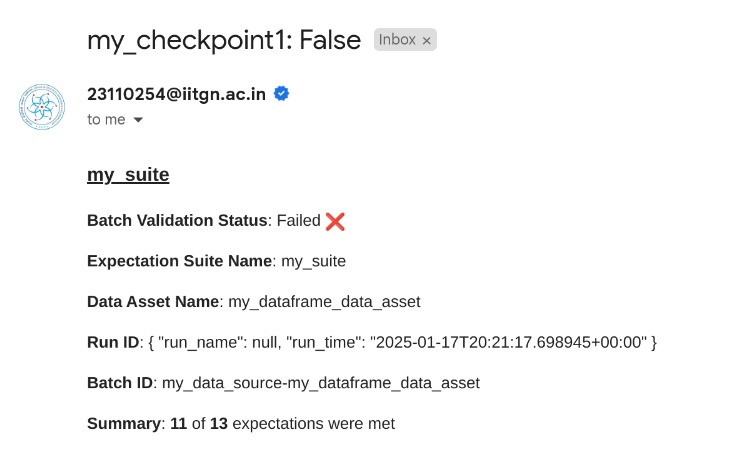